In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
os.chdir('C:/Users/joelt/Desktop/Jupyter/prac 2/dogs-vs-cats')
if os.path.isdir('train/dog')is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('cat*'),500):
        shutil.move(c,'train/cat')
    for c in random.sample(glob.glob('dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'valid/cat')
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')

In [39]:
train_path=('C:/Users/joelt/Desktop/Jupyter/prac 2/dogs-vs-cats/train')
valid_path=('C:/Users/joelt/Desktop/Jupyter/prac 2/dogs-vs-cats/valid')
test_path=('C:/Users/joelt/Desktop/Jupyter/prac 2/dogs-vs-cats/test')

In [40]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [44]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [45]:
imgs, labels = next (train_batches)

In [46]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

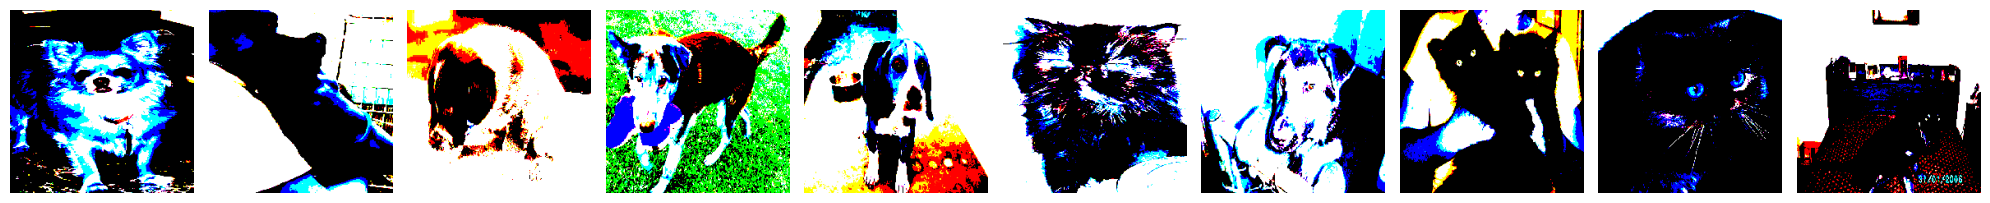

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [47]:
plotImages(imgs)
print(labels)

In [51]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation = 'softmax')
])

In [52]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
model.fit(x=train_batches, validation_data=valid_batches, epochs = 10, verbose = 2)

Epoch 1/10
100/100 - 25s - loss: 15.0938 - accuracy: 0.5800 - val_loss: 6.8195 - val_accuracy: 0.5850 - 25s/epoch - 252ms/step
Epoch 2/10
100/100 - 21s - loss: 2.1379 - accuracy: 0.7720 - val_loss: 3.9077 - val_accuracy: 0.6400 - 21s/epoch - 214ms/step
Epoch 3/10
100/100 - 21s - loss: 0.7237 - accuracy: 0.8780 - val_loss: 2.9536 - val_accuracy: 0.5900 - 21s/epoch - 210ms/step
Epoch 4/10
100/100 - 21s - loss: 0.2687 - accuracy: 0.9460 - val_loss: 3.0084 - val_accuracy: 0.6400 - 21s/epoch - 206ms/step
Epoch 5/10
100/100 - 21s - loss: 0.0447 - accuracy: 0.9870 - val_loss: 2.8694 - val_accuracy: 0.6400 - 21s/epoch - 210ms/step
Epoch 6/10
100/100 - 21s - loss: 0.0203 - accuracy: 0.9890 - val_loss: 2.5286 - val_accuracy: 0.6800 - 21s/epoch - 208ms/step
Epoch 7/10
100/100 - 21s - loss: 0.0247 - accuracy: 0.9910 - val_loss: 2.8073 - val_accuracy: 0.6450 - 21s/epoch - 208ms/step
Epoch 8/10
100/100 - 21s - loss: 0.0055 - accuracy: 0.9980 - val_loss: 2.5877 - val_accuracy: 0.6650 - 21s/epoch - 20

In [55]:
predictions = model.predict(x=test_batches, verbose = 0)

In [56]:
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [57]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [61]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                          title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization ")
    
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

In [62]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization 
[[28 22]
 [18 32]]


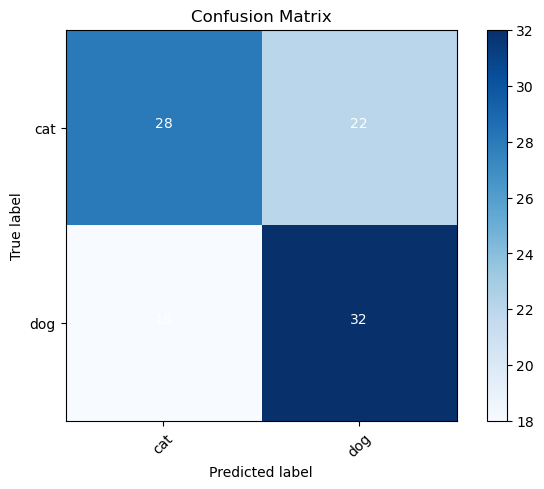

In [63]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [64]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 89s 0us/step


In [65]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [66]:
for layer in model.layers:
    layer.trainable = False

In [67]:
model.add(Dense(units=2, activation = 'softmax'))

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [69]:
model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [70]:
model.fit(x=train_batches, validation_data=valid_batches, epochs = 5, verbose = 2)

Epoch 1/5
100/100 - 78s - loss: 0.3141 - accuracy: 0.8640 - val_loss: 0.1342 - val_accuracy: 0.9450 - 78s/epoch - 777ms/step
Epoch 2/5
100/100 - 79s - loss: 0.0871 - accuracy: 0.9700 - val_loss: 0.0960 - val_accuracy: 0.9550 - 79s/epoch - 785ms/step
Epoch 3/5
100/100 - 78s - loss: 0.0529 - accuracy: 0.9830 - val_loss: 0.0796 - val_accuracy: 0.9550 - 78s/epoch - 778ms/step
Epoch 4/5
100/100 - 77s - loss: 0.0364 - accuracy: 0.9900 - val_loss: 0.0718 - val_accuracy: 0.9650 - 77s/epoch - 774ms/step
Epoch 5/5
100/100 - 80s - loss: 0.0250 - accuracy: 0.9970 - val_loss: 0.0695 - val_accuracy: 0.9650 - 80s/epoch - 804ms/step


In [71]:
predictions = model.predict(x=test_batches, verbose = 0)

In [72]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [73]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [74]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix, without normalization 
[[49  1]
 [ 1 49]]


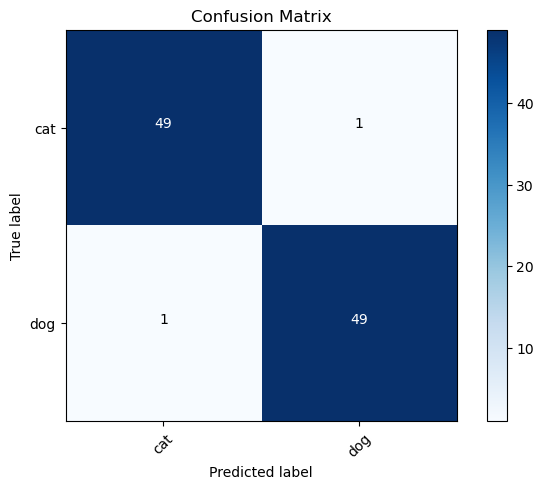

In [75]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')